In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
names1880=pd.read_csv("babynames/yob1880.txt", 
            names=['name', 'sex', 'births'])

In [3]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
#그룹화 연산:성별 기준 그룹화 -> 성별 태어난 아이들의 수
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [5]:
pieces=[] #[1880df, 1881df, ..., 2010df]

for year in range(1880,2011):
    df=pd.read_csv("babynames/yob%d.txt" % year,
               names=['name','sex','births'])
    df['year']=year
    pieces.append(df)

In [6]:
len(pieces)

131

In [7]:
names=pd.concat(pieces, ignore_index=True)

In [8]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [9]:
# sex    F      M
# year
# 1880  2만    3만
# ...    ...   ...
# 2010

In [10]:
total_births=names.pivot_table('births',aggfunc=sum, index='year', columns='sex')

<AxesSubplot:title={'center':'Total births'}, xlabel='year'>

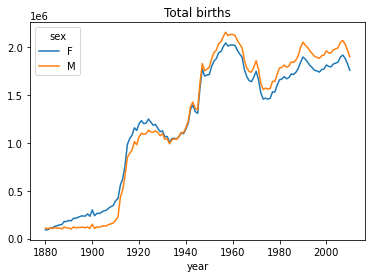

In [11]:
total_births.tail()
total_births.plot(title="Total births")

In [12]:
names #year, sex 그룹화

def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group
    #     (1880,F).태어난아이수/(1880,F).태어난아이수.sum()
    #880년에 태어난 여자아이 수/1880년에 태어난 여자아이 수의 전체 합계
    #print("="*50)
names=names.groupby(['year','sex']).apply(add_prop)
#             131 * 2 = 262개 그룹

In [13]:
names
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [14]:
#각 연도별/성별에 따른 선호하는 이름 1000개씩 추출
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
    #ascending=True(오름차순 정렬), 
    #ascending=False(내림차순 정렬)

top1000=names.groupby(['year','sex']).apply(get_top1000)
#연도와 성별에 따른 그룹화 -> 각 그룹에 대해 함수를 적용해라

In [15]:
top1000.reset_index(inplace=True, drop=True)

In [16]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [17]:
#이름 유행 분석
top1000['sex'] # top1000.sex

boys=top1000[top1000['sex']=='M']
#불린참조 : 참(True)에 해당되는 자료들만 추출
girls=top1000[top1000['sex']=='F']

In [18]:
girls

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
260872,Violeta,F,250,2010,0.000142
260873,Leilah,F,250,2010,0.000142
260874,Alaysia,F,250,2010,0.000142
260875,Dania,F,249,2010,0.000142


In [19]:
total_births=top1000.pivot_table("births", index='year', 
                   columns='name',
                   aggfunc=sum)

# 예를들어, aaa 라는 이름의 경우에는
# 1880~2010년까지 단 한번도 1000 등 안에 들어가본적이 없다

In [20]:
# 131 rows × 6868 columns
# 131년(1880~2010)
# 6868?1880~2010 각 연도별 인기 있는 이름 상위 1000개씩 추출을 
# 했을때, 중복을 제외한(unique) 이름에 대한 종류의 개수


In [21]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [22]:
total_births['John']

year
1880     9701.0
1881     8795.0
1882     9597.0
1883     8934.0
1884     9427.0
         ...   
2006    15140.0
2007    14405.0
2008    13273.0
2009    12048.0
2010    11424.0
Name: John, Length: 131, dtype: float64